In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Import data file and assign to variable
data = pd.read_csv('/content/cs-1.csv', parse_dates=['date'])

In [ ]:
# Show all column names within dataset
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [ ]:
# Start of data set
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
# Describe the data by column
data.describe().T

,count,mean,std,min,25%,50%,75%,max
open,619029.0,8.302333e+01,9.737877e+01,1.62,40.220,62.59,94.37,2.044000e+03
high,619032.0,8.377831e+01,9.820752e+01,1.69,40.620,63.15,95.18,2.067990e+03
low,619032.0,8.225610e+01,9.650742e+01,1.50,39.830,62.02,93.54,2.035110e+03
close,619040.0,8.304376e+01,9.738975e+01,1.59,40.245,62.62,94.41,2.049000e+03
volume,619040.0,4.321823e+06,8.693610e+06,0.00,1070320.500,2082093.50,4284509.25,6.182376e+08


In [ ]:
# Sum NaN values per column within dataset
data.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [ ]:
# Clean data set and ignore any rows with NaN value
data = data.dropna(how='any')
print(f"Shape of dataset is {data.shape}")

Shape of dataset is (619029, 7)


In [ ]:
# Good to have an idea of the date range
print(f"First recorded date: {data['date'].min()}")
print(f"Last recorded date: {data['date'].max()}")

First recorded date: 2013-02-08 00:00:00
Last recorded date: 2018-02-07 00:00:00


# What season of the year is the best time to trade?

We will look at the data to see if there is a best time of year to trade, and if so, what time of year or season is this in. Since the data set is for American based firms listed on the New York stock exchange, we will look at the time of year and season from the northern hemisphere perspective:

* Spring from March 20th to June 20th
* Summer from June 21st to September 23rd
* Autumn from September 24th to December 22nd
* And Winter from December 23rd to March 19th.


This question can be answered by looking at a few factors that we can assess by the dataset. For instance; volatility. If there are a large amount of shares being bought on one stock on a certain day, then the stock exchange will represent growth and vice versa if there are a lot of sells acorss all stocks. Let's take a look at the average traded volume per year, month, week and day.

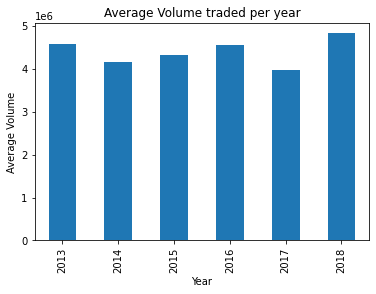

In [ ]:
year_data = data.set_index('date').groupby(pd.Grouper(freq='Y'))
year_data = year_data['volume'].mean().plot(kind='bar')
year_data.set_xticklabels(('2013', '2014', '2015', '2016', '2017', '2018'))
year_data.set_ylabel('Average Volume')
year_data.set_xlabel('Year')
year_data.set_title('Average Volume traded per year')
plt.show()

In [ ]:
#Retreiving the mean volume group by the month
avg_permonth = data.set_index('date').groupby(pd.Grouper(freq='M'))
avg_permonth = avg_permonth['volume'].mean()

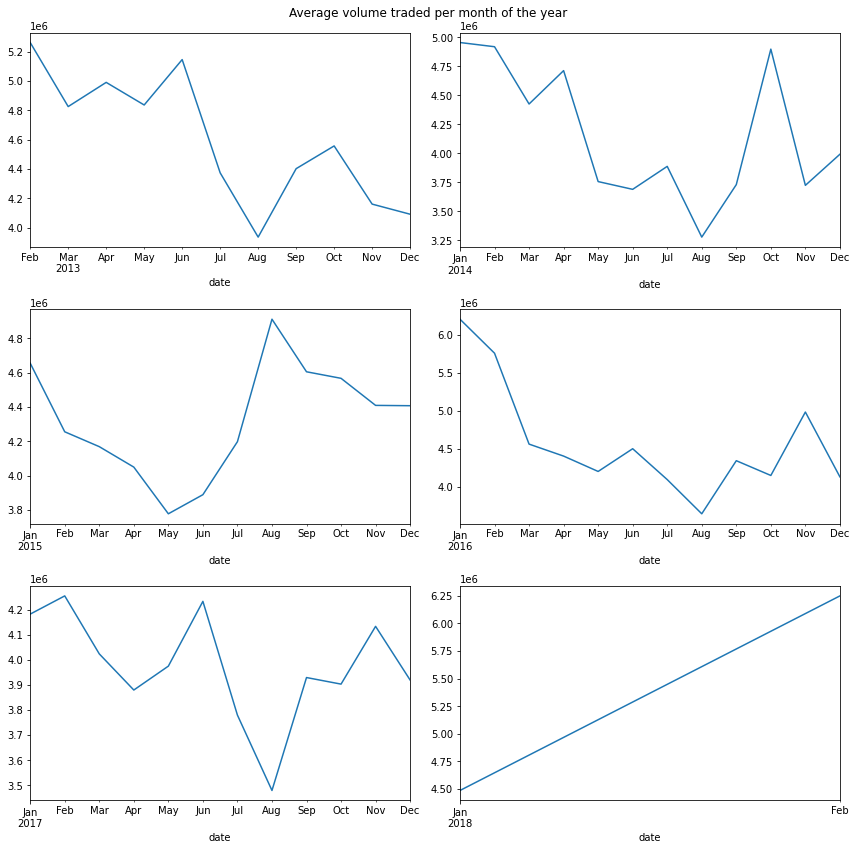

In [ ]:
# Plot to show mean of volume per month of year
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
for i, (year, sg) in enumerate(avg_permonth.groupby(avg_permonth.index.year)):
    sg.plot(ax=axs[i//2, i%2])
    
fig.suptitle('Average volume traded per month of the year', fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Apart from 2015, August seems to be the time where the volume seems to be at its lowest amount. This is in mid summer, not the beggining or right at the end of it. Why would the first 8 months of the year go south for the general market? And what is it about August that creates a rebound? Does this cycle throughout each year?

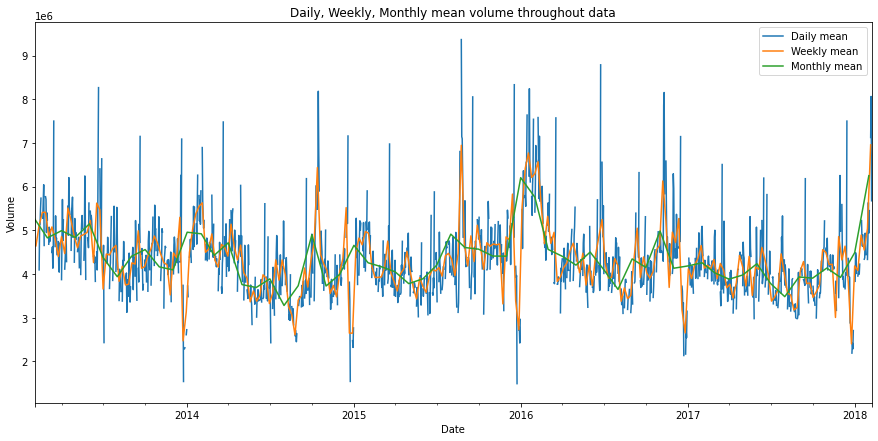

In [ ]:
# Average volume per day
avg_perday = data.set_index('date').groupby(pd.Grouper(freq='d'))
avg_perday['volume'].mean().plot(figsize=(15, 7))

# Average volume per week
avg_perweek = data.set_index('date').groupby(pd.Grouper(freq='w'))
avg_perweek['volume'].mean().plot(figsize=(15, 7))

# Average volume per month
avg_permonth = data.set_index('date').groupby(pd.Grouper(freq='m'))
avg_permonth['volume'].mean().plot(figsize=(15, 7))

plt.legend(('Daily mean', 'Weekly mean', 'Monthly mean'))
plt.title('Daily, Weekly, Monthly mean volume throughout data')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.show()

At the end of each year there are huge drops in volume for the NYSE's listed companies and right after the turn of each new year, there are high spikes in the volume.

Drops at the end of each year could be because:

* Majority of traders not taking risk because of less free cash due to festive season.
* Experienced traders waiting for stock to go cheaper to buy larger bulk quantity

And spikes could potentially be due to:

* Fund allocation due to asset managers decision making for the company funds per year
* Private investors gaining bonuses per year and have more to risk
* Retailers reporting profits taken from festive season

If we assume that private investors and asset managers buy stock in late December or early January then we can assume that the best time of year to buy stock as a private investor would be the same time. As a private investor you could ride the wave of buying cheap and selling high. You would just need to find the right stock to buy!

## Apple vs. Microsoft

By comparing Apple and Microsoft we're looking at the two biggest tech stocks on the market (most popular anyway, not by market share. I don't know the market share of these companies!). Analysing these two stocks and comparing against each other by opening and closing prices, high and low price, we can judge what would've been a great day to buy these two particular shares.

In [ ]:
# Apple 5 year history
dataAAPL = data.loc[data.Name=='AAPL', :]
dataAAPL

,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
2513,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
2514,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
2515,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
2516,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [ ]:
# Amazon 5 year history
dataMSFT = data.loc[data.Name=='MSFT', :]
dataMSFT

,date,open,high,low,close,volume,Name
390198,2013-02-08,27.35,27.710,27.3100,27.55,33318306,MSFT
390199,2013-02-11,27.65,27.920,27.5000,27.86,32247549,MSFT
390200,2013-02-12,27.88,28.000,27.7500,27.88,35990829,MSFT
390201,2013-02-13,27.93,28.110,27.8800,28.03,41715530,MSFT
390202,2013-02-14,27.92,28.060,27.8700,28.04,32663174,MSFT
...,...,...,...,...,...,...,...
391452,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT
391453,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT
391454,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT
391455,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT


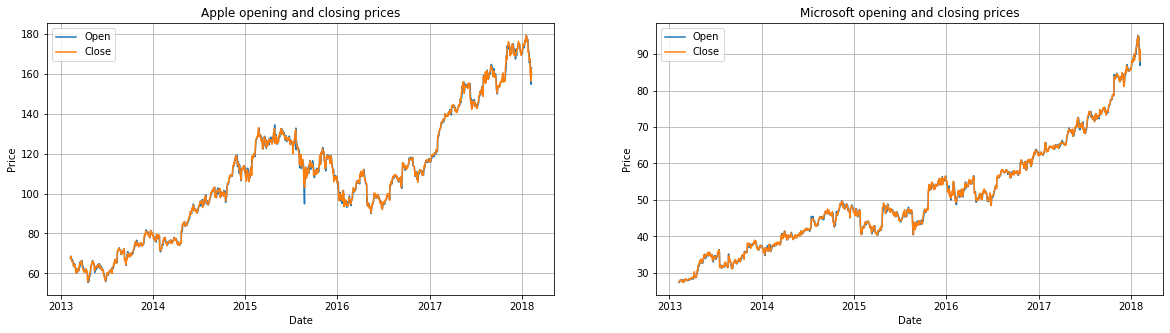

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Apple graph
plt.subplot(121)
plt.plot(dataAAPL['date'], dataAAPL['open'])
plt.plot(dataAAPL['date'], dataAAPL['close'])
plt.title('Apple opening and closing prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(('Open', 'Close'), loc='upper left')
plt.grid(True)

# Microsoft graph
plt.subplot(122)
plt.plot(dataMSFT['date'], dataMSFT['open'])
plt.plot(dataMSFT['date'], dataMSFT['close'])
plt.title('Microsoft opening and closing prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend(('Open', 'Close'), loc='upper left')


plt.show()

We can see that there is not much difference between the opening and closing prices for these two shares.The best points on the graph would be the lowest opening price and highest closing price. For Apple you can see just over the mid point of 2015 to 2016 the opening price was much lower than the closing price. For Microsoft there's not much visible opportunity for day trading. Long term holding though would have given a large return.

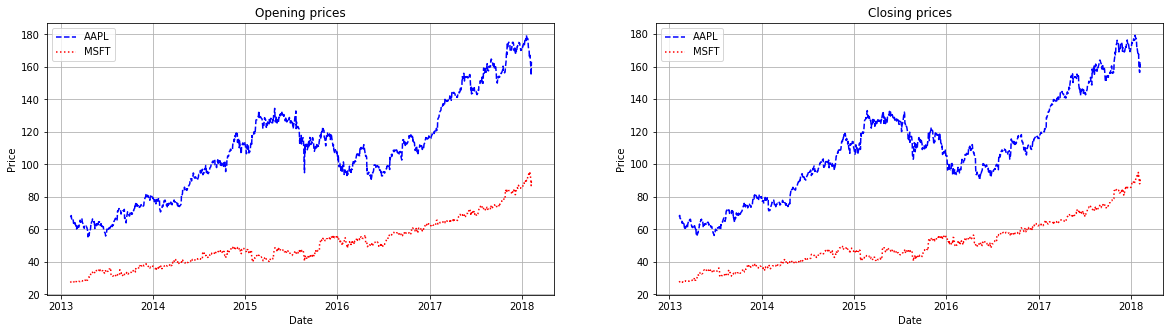

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Opening prices
plt.subplot(121)
plt.plot(dataAAPL['date'], dataAAPL['open'], '--b')
plt.plot(dataMSFT['date'], dataMSFT['open'], ':r')
plt.title('Opening prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(('AAPL', 'MSFT'), loc='upper left')
plt.grid(True)

# Closing prices
plt.subplot(122)
plt.plot(dataAAPL['date'], dataAAPL['close'], '--b')
plt.plot(dataMSFT['date'], dataMSFT['close'], ':r')
plt.title('Closing prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend(('AAPL', 'MSFT'), loc='upper left')


plt.show()

Apple has a larger share price which would bring back a larger profit if it was invested by bulk at specific times. However there is the risk of losing much more too.

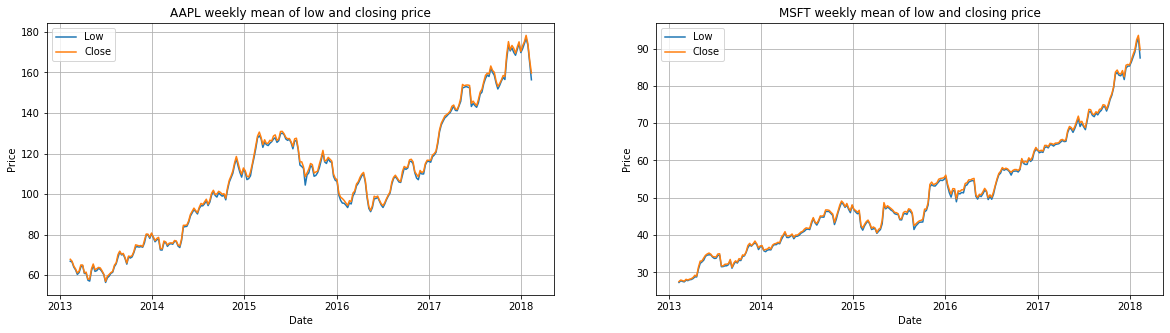

In [ ]:
df1 = dataAAPL.set_index('date').loc[:, ['low']]
df2 = dataAAPL.set_index('date').loc[:, ['close']]
df3 = dataMSFT.set_index('date').loc[:, ['low']]
df4 = dataMSFT.set_index('date').loc[:, ['close']]

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

plt.subplot(121)
plt.plot(df1.groupby(pd.Grouper(freq='w')).mean())
plt.plot(df2.groupby(pd.Grouper(freq='w')).mean())
plt.grid(True)
plt.legend(('Low', 'Close'))
plt.title('AAPL weekly mean of low and closing price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.subplot(122)
plt.plot(df3.groupby(pd.Grouper(freq='w')).mean())
plt.plot(df4.groupby(pd.Grouper(freq='w')).mean())
plt.grid(True)
plt.legend(('Low', 'Close'))
plt.title('MSFT weekly mean of low and closing price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

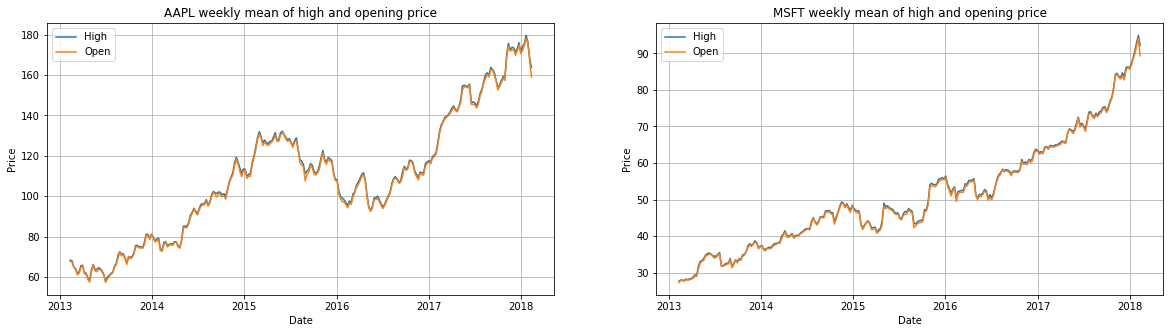

In [ ]:
df1 = dataAAPL.set_index('date').loc[:, ['high']]
df2 = dataAAPL.set_index('date').loc[:, ['open']]
df3 = dataMSFT.set_index('date').loc[:, ['high']]
df4 = dataMSFT.set_index('date').loc[:, ['open']]

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

plt.subplot(121)
plt.plot(df1.groupby(pd.Grouper(freq='w')).mean())
plt.plot(df2.groupby(pd.Grouper(freq='w')).mean())
plt.grid(True)
plt.legend(('High', 'Open'))
plt.title('AAPL weekly mean of high and opening price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.subplot(122)
plt.plot(df3.groupby(pd.Grouper(freq='w')).mean())
plt.plot(df4.groupby(pd.Grouper(freq='w')).mean())
plt.grid(True)
plt.legend(('High', 'Open'))
plt.title('MSFT weekly mean of high and opening price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

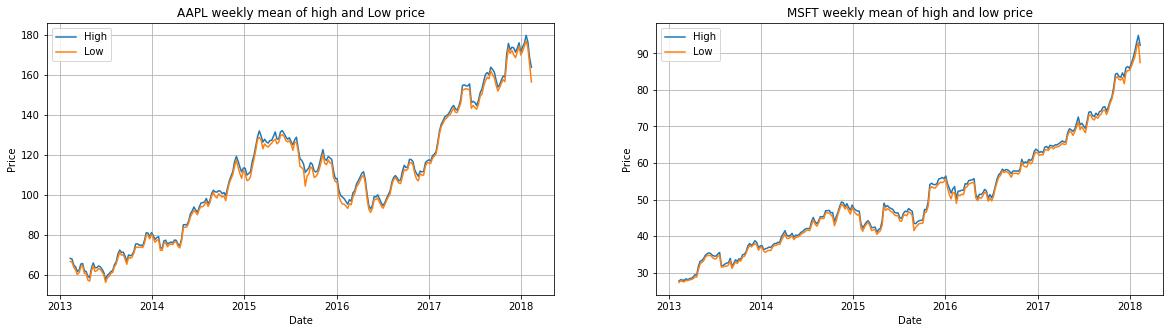

In [ ]:
df1 = dataAAPL.set_index('date').loc[:, ['high']]
df2 = dataAAPL.set_index('date').loc[:, ['low']]
df3 = dataMSFT.set_index('date').loc[:, ['high']]
df4 = dataMSFT.set_index('date').loc[:, ['low']]

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

plt.subplot(121)
plt.plot(df1.groupby(pd.Grouper(freq='w')).mean())
plt.plot(df2.groupby(pd.Grouper(freq='w')).mean())
plt.grid(True)
plt.legend(('High', 'Low'))
plt.title('AAPL weekly mean of high and Low price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.subplot(122)
plt.plot(df3.groupby(pd.Grouper(freq='w')).mean())
plt.plot(df4.groupby(pd.Grouper(freq='w')).mean())
plt.grid(True)
plt.legend(('High', 'Low'))
plt.title('MSFT weekly mean of high and low price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

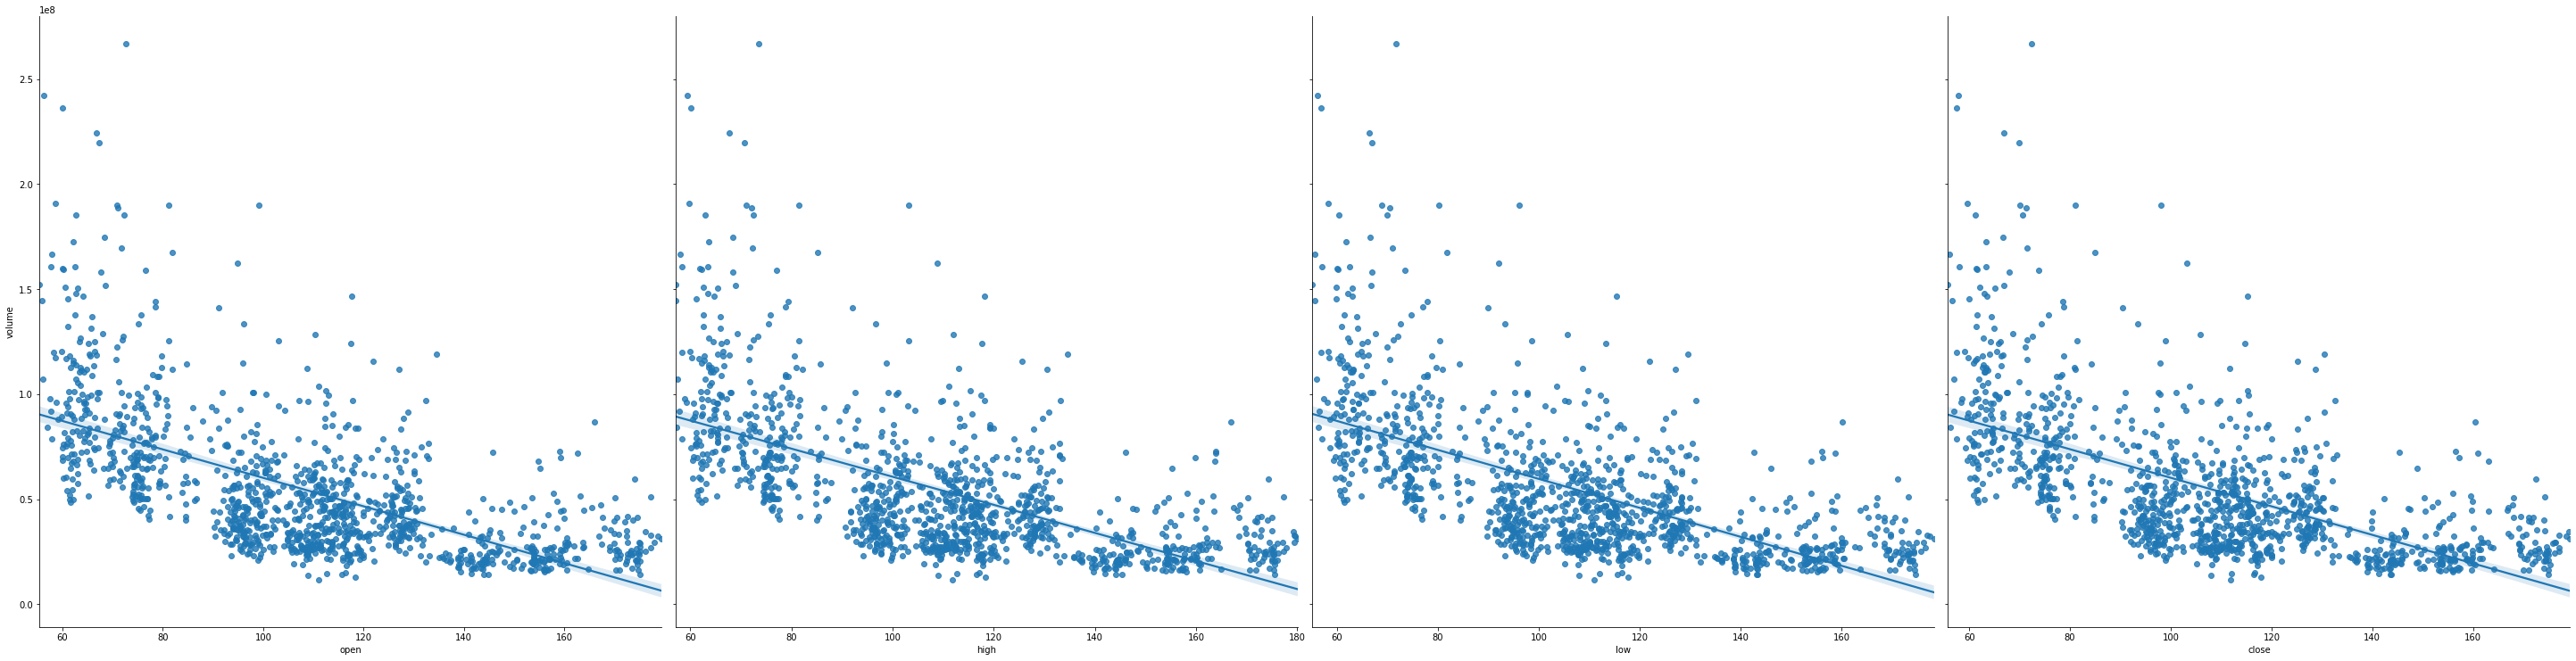

In [ ]:
sns.pairplot(dataAAPL, x_vars=['open', 'high', 'low', 'close'], y_vars=['volume'], height=10, kind='reg')

As we can see by using seaborns pairplot, there are groups of different trades by opening price vs volume. There are gaps between such points also which may indicate a wary market. It seems the higher the volume the lower the opening price and higher the opening price the lower the volume. This is of course an obvious thing, the higher something costs the less you can have of it.

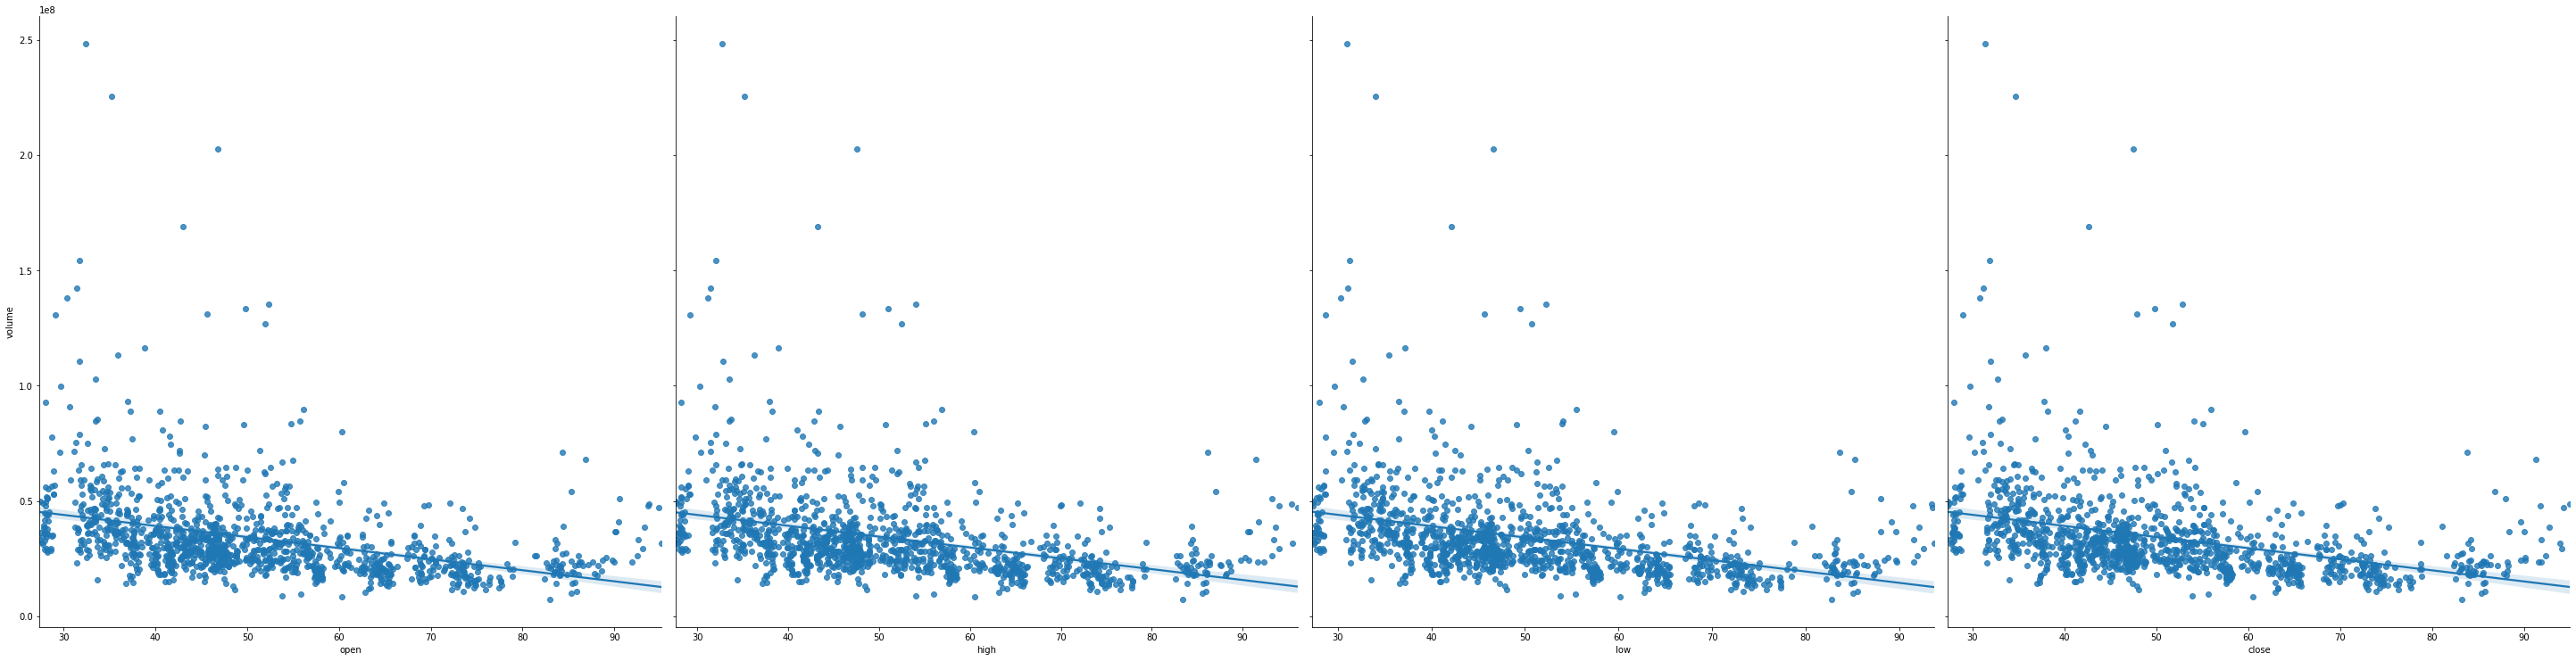

In [ ]:
sns.pairplot(dataMSFT, x_vars=['open', 'high', 'low', 'close'], y_vars=['volume'], height=10, kind='reg')

Microsofts scatter points don't seem as spread out as Apple's. They all seem to cluster together with what I would assume between the 40-50 range of each graph being an area where volume traded has clustered.

### Scatter plots of Apple in 2015 and 2016

In [ ]:
aapl_2015 = dataAAPL.set_index('date')
aapl_2015 = aapl_2015.loc['2015-01':'2015-12']

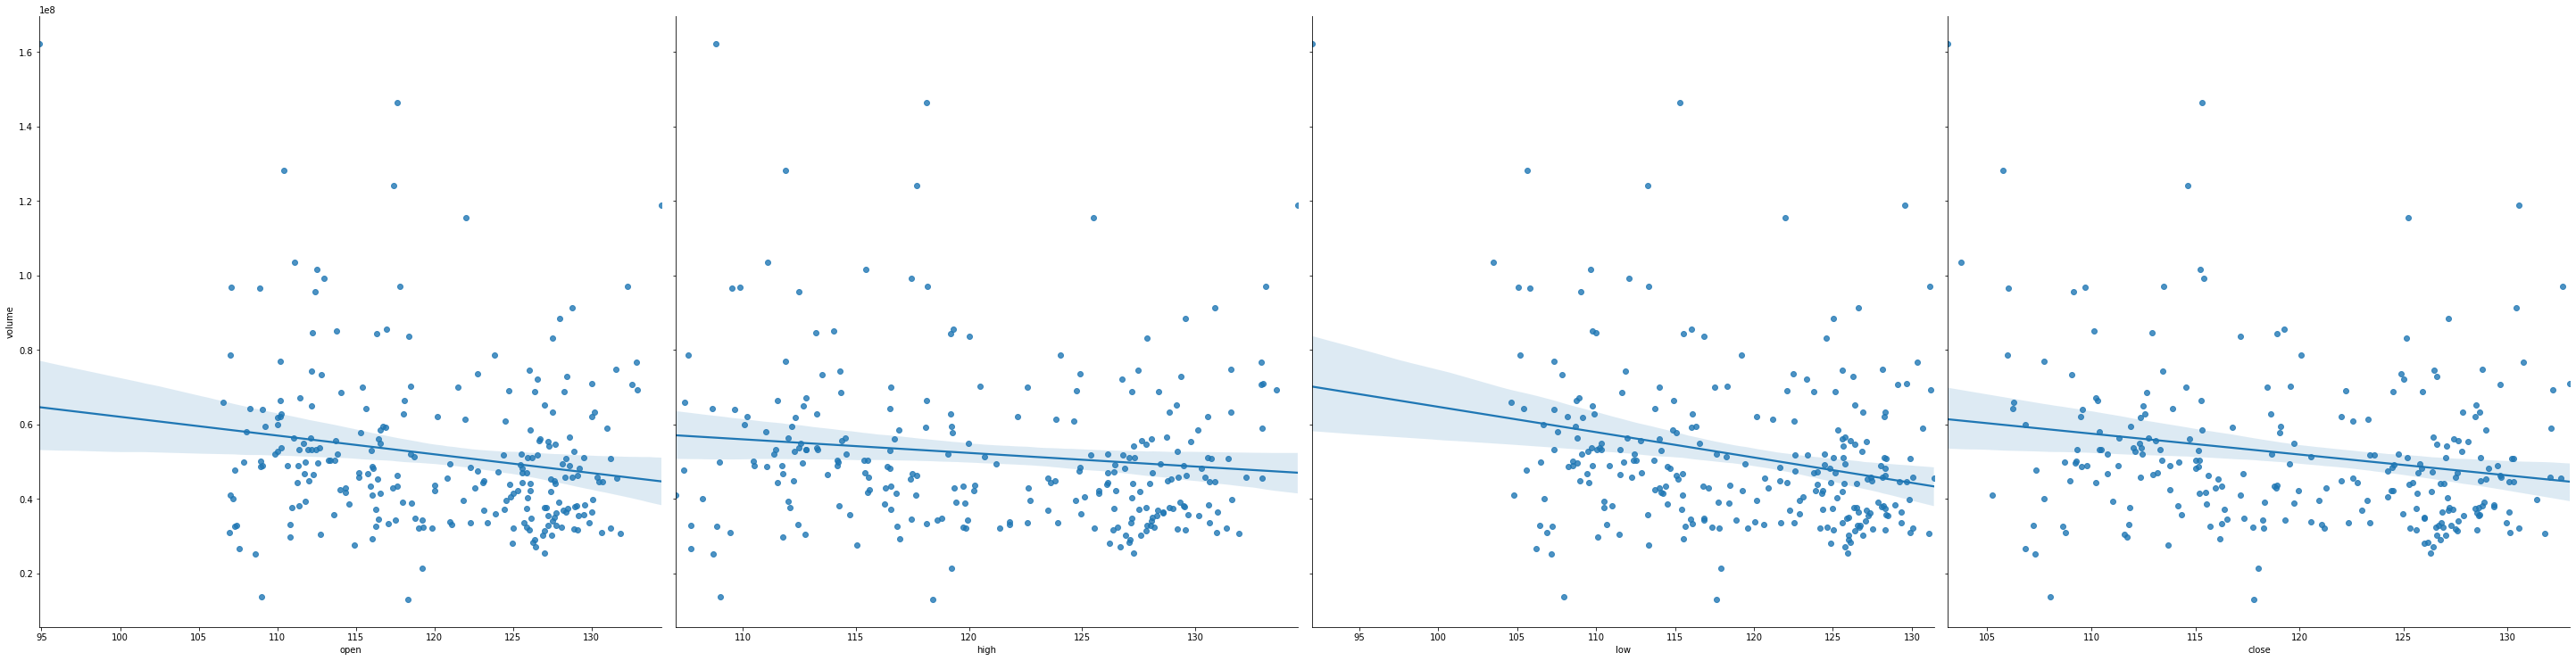

In [ ]:
sns.pairplot(aapl_2015, x_vars=['open', 'high', 'low', 'close'], y_vars=['volume'], height=10, kind='reg')

In [ ]:
input = 125
print(dataAAPL.iloc[(dataAAPL['open']-input).abs().argsort()[:2]])
print(dataAAPL.iloc[(dataAAPL['high']-input).abs().argsort()[:2]])
print(dataAAPL.iloc[(dataAAPL['low']-input).abs().argsort()[:2]])
print(dataAAPL.iloc[(dataAAPL['close']-input).abs().argsort()[:2]])

           date    open     high     low   close    volume  Name
1799 2015-04-02  125.03  125.560  124.19  125.32  32220131  AAPL
1868 2015-07-13  125.03  125.755  124.32  125.66  41440538  AAPL
           date    open    high     low   close    volume  Name
1786 2015-03-16  123.88  124.95  122.87  124.95  35874300  AAPL
1764 2015-02-11  122.77  124.92  122.50  124.88  73561797  AAPL
           date    open    high     low   close    volume  Name
1802 2015-04-08  125.85  126.40  124.97  125.60  37329243  AAPL
1869 2015-07-14  126.04  126.37  125.04  125.61  31768139  AAPL
           date    open    high     low   close    volume  Name
1822 2015-05-06  126.56  126.75  123.36  125.01  72141010  AAPL
1786 2015-03-16  123.88  124.95  122.87  124.95  35874300  AAPL


So for the grouping on the scatter diagrams for the columns against volume, the dates range from earliest as February to latest July. This is where a large grouping of scatter points are on each diagram.

In [ ]:
aapl_2016 = dataAAPL.set_index('date')
aapl_2016 = aapl_2016.loc['2016-01':'2016-12']

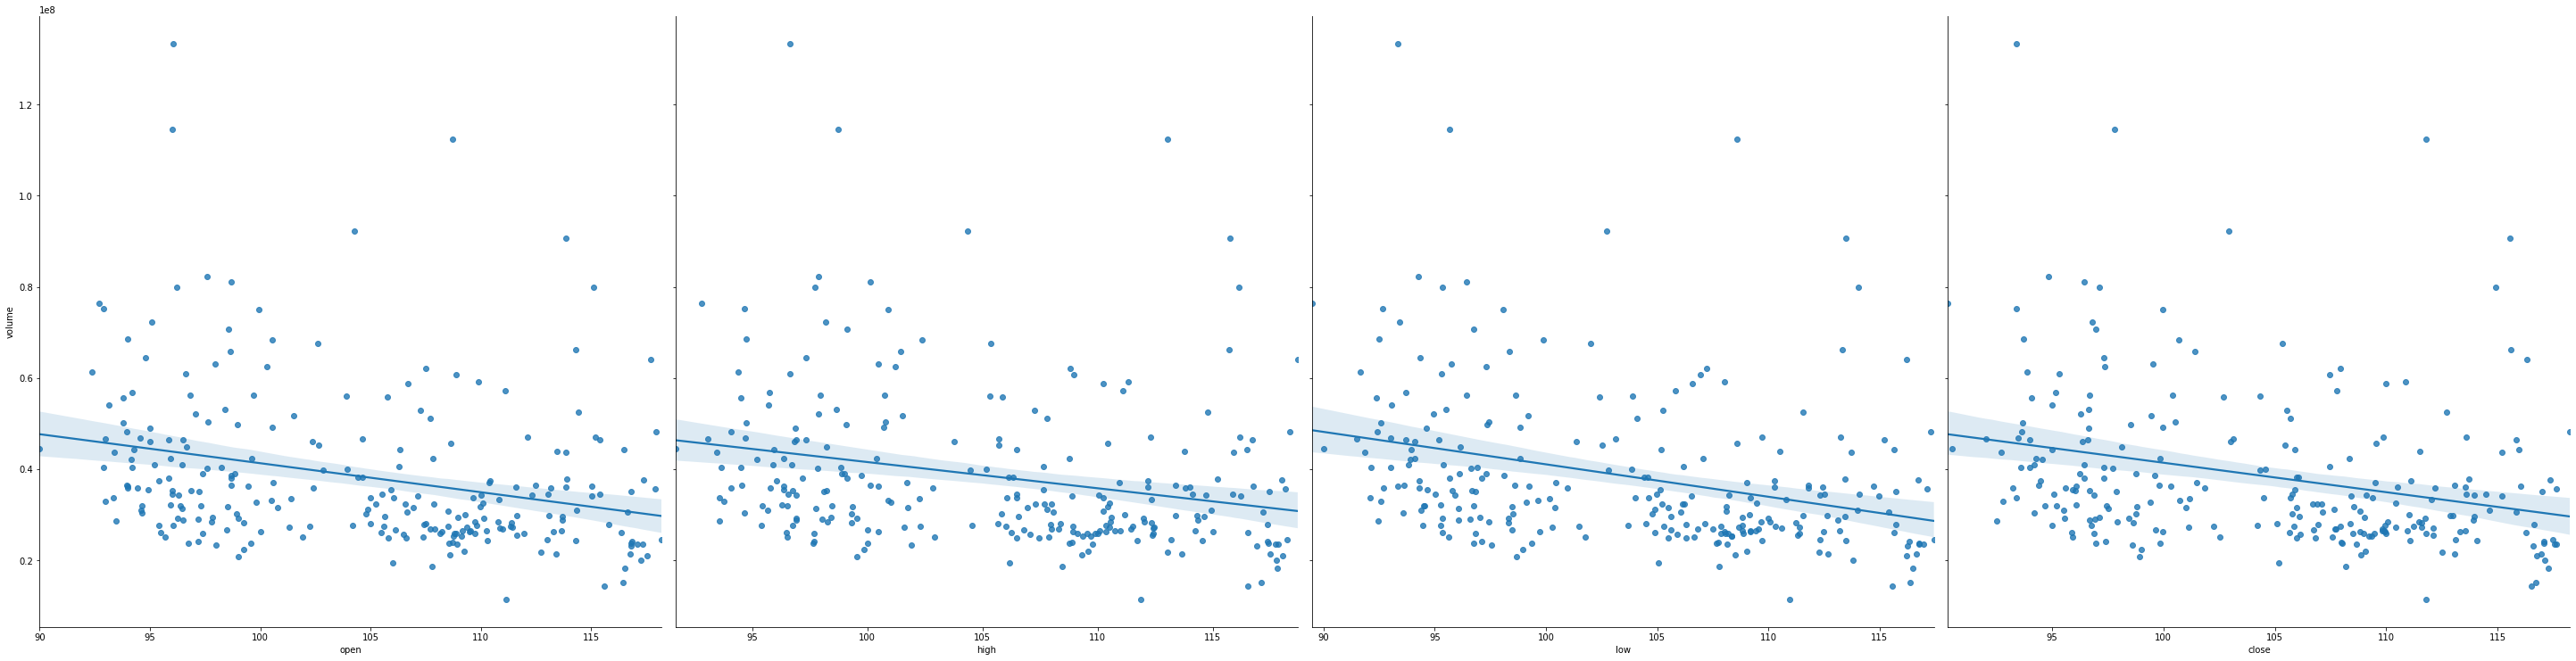

In [ ]:
sns.pairplot(aapl_2016, x_vars=['open', 'high', 'low', 'close'], y_vars=['volume'], height=10, kind='reg')

In [ ]:
input = 110
print(dataAAPL.iloc[(dataAAPL['open']-input).abs().argsort()[:2]])
print(dataAAPL.iloc[(dataAAPL['high']-input).abs().argsort()[:2]])
print(dataAAPL.iloc[(dataAAPL['low']-input).abs().argsort()[:2]])
print(dataAAPL.iloc[(dataAAPL['close']-input).abs().argsort()[:2]])

           date   open    high      low   close    volume  Name
1905 2015-09-02  110.0  112.34  109.131  112.34  61888812  AAPL
2222 2016-12-05  110.0  110.03  108.250  109.11  34324540  AAPL
           date    open    high     low   close    volume  Name
2050 2016-04-01  108.78  110.00  108.20  109.99  25873950  AAPL
2222 2016-12-05  110.00  110.03  108.25  109.11  34324540  AAPL
           date    open    high     low   close    volume  Name
2213 2016-11-21  110.12  111.99  110.01  111.73  29264571  AAPL
1901 2015-08-27  112.25  113.24  110.02  112.92  84616056  AAPL
           date    open    high    low   close    volume  Name
2210 2016-11-16  106.70  110.23  106.6  109.99  58840522  AAPL
2050 2016-04-01  108.78  110.00  108.2  109.99  25873950  AAPL


### Scatter plots of Microsoft in 2015

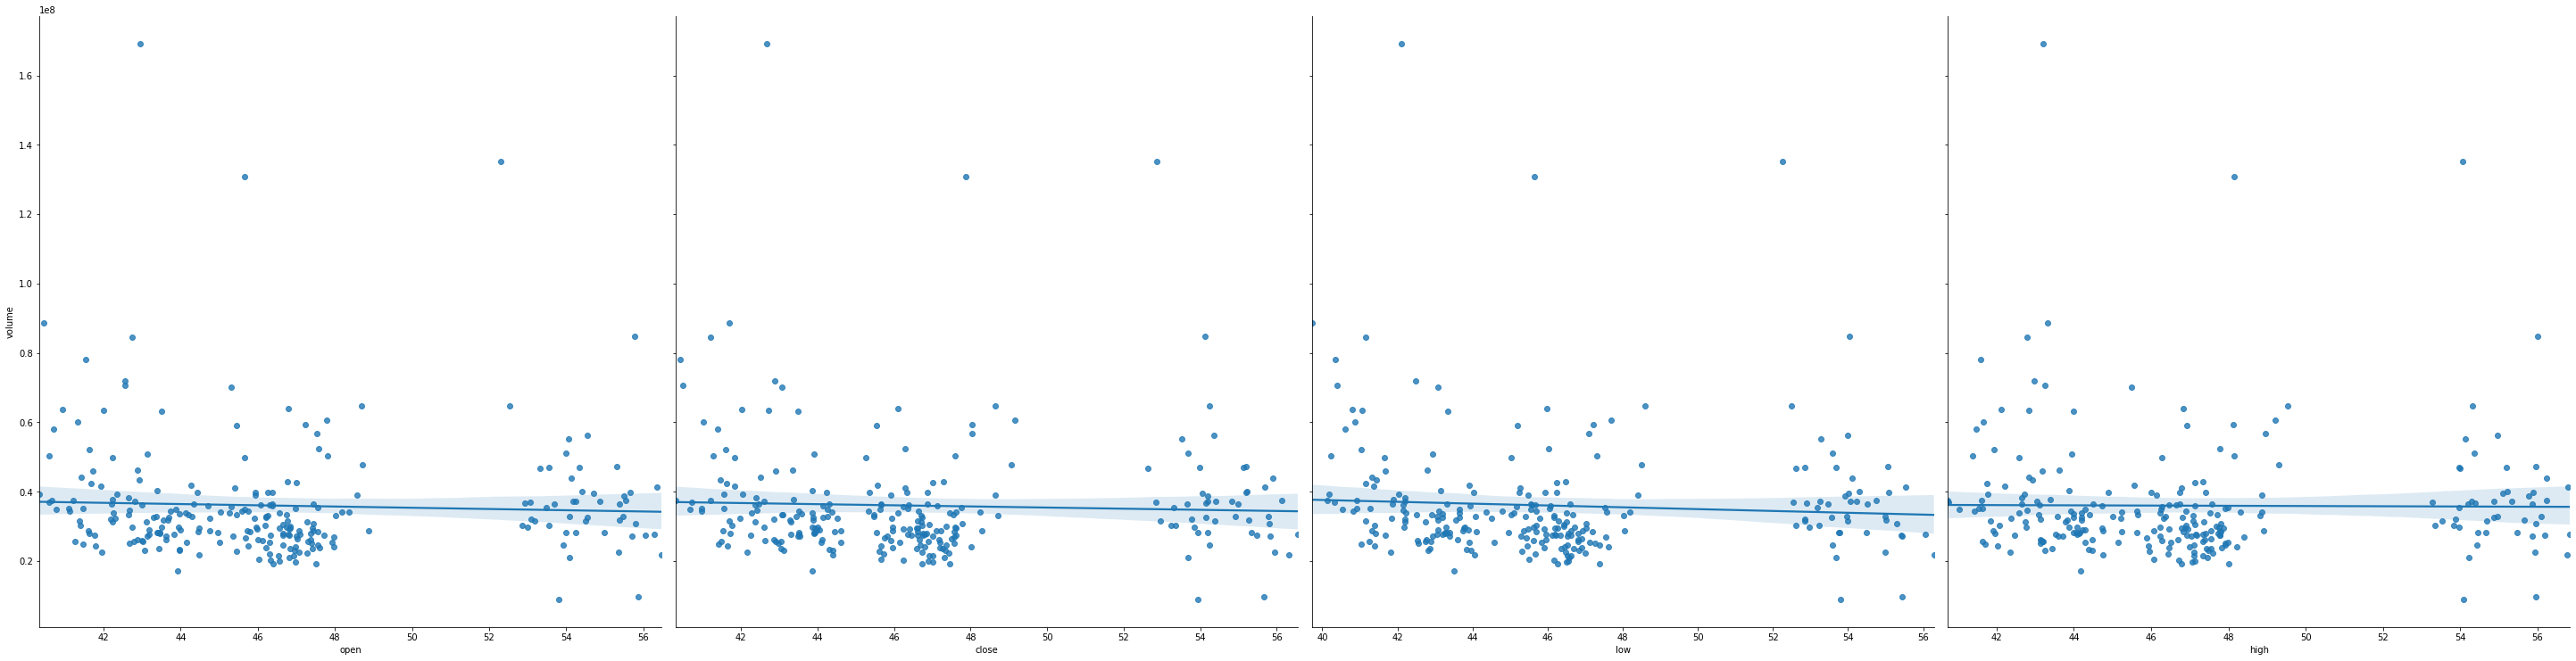

In [ ]:
msft_2015 = dataMSFT.set_index('date')
msft_2015 = msft_2015.loc['2015-01':'2015-12']

sns.pairplot(msft_2015, x_vars=['open', 'close', 'low', 'high'], y_vars=['volume'], height=10, kind='reg')

In [ ]:
input = 47
print(dataMSFT.iloc[(dataAAPL['open']-input).abs().argsort()[:2]])
print(dataMSFT.iloc[(dataAAPL['high']-input).abs().argsort()[:2]])
print(dataMSFT.iloc[(dataAAPL['low']-input).abs().argsort()[:2]])
print(dataMSFT.iloc[(dataAAPL['close']-input).abs().argsort()[:2]])

             date   open   high    low   close    volume  Name
390246 2013-04-19  29.62  30.24  29.61  29.765  99790116  MSFT
390295 2013-06-28  34.38  34.79  34.34  34.545  65545445  MSFT
             date   open   high    low   close    volume  Name
390246 2013-04-19  29.62  30.24  29.61  29.765  99790116  MSFT
390295 2013-06-28  34.38  34.79  34.34  34.545  65545445  MSFT
             date   open   high    low   close    volume  Name
390246 2013-04-19  29.62  30.24  29.61  29.765  99790116  MSFT
390295 2013-06-28  34.38  34.79  34.34  34.545  65545445  MSFT
             date   open   high    low   close    volume  Name
390246 2013-04-19  29.62  30.24  29.61  29.765  99790116  MSFT
390245 2013-04-18  28.95  28.98  28.50  28.790  56772087  MSFT


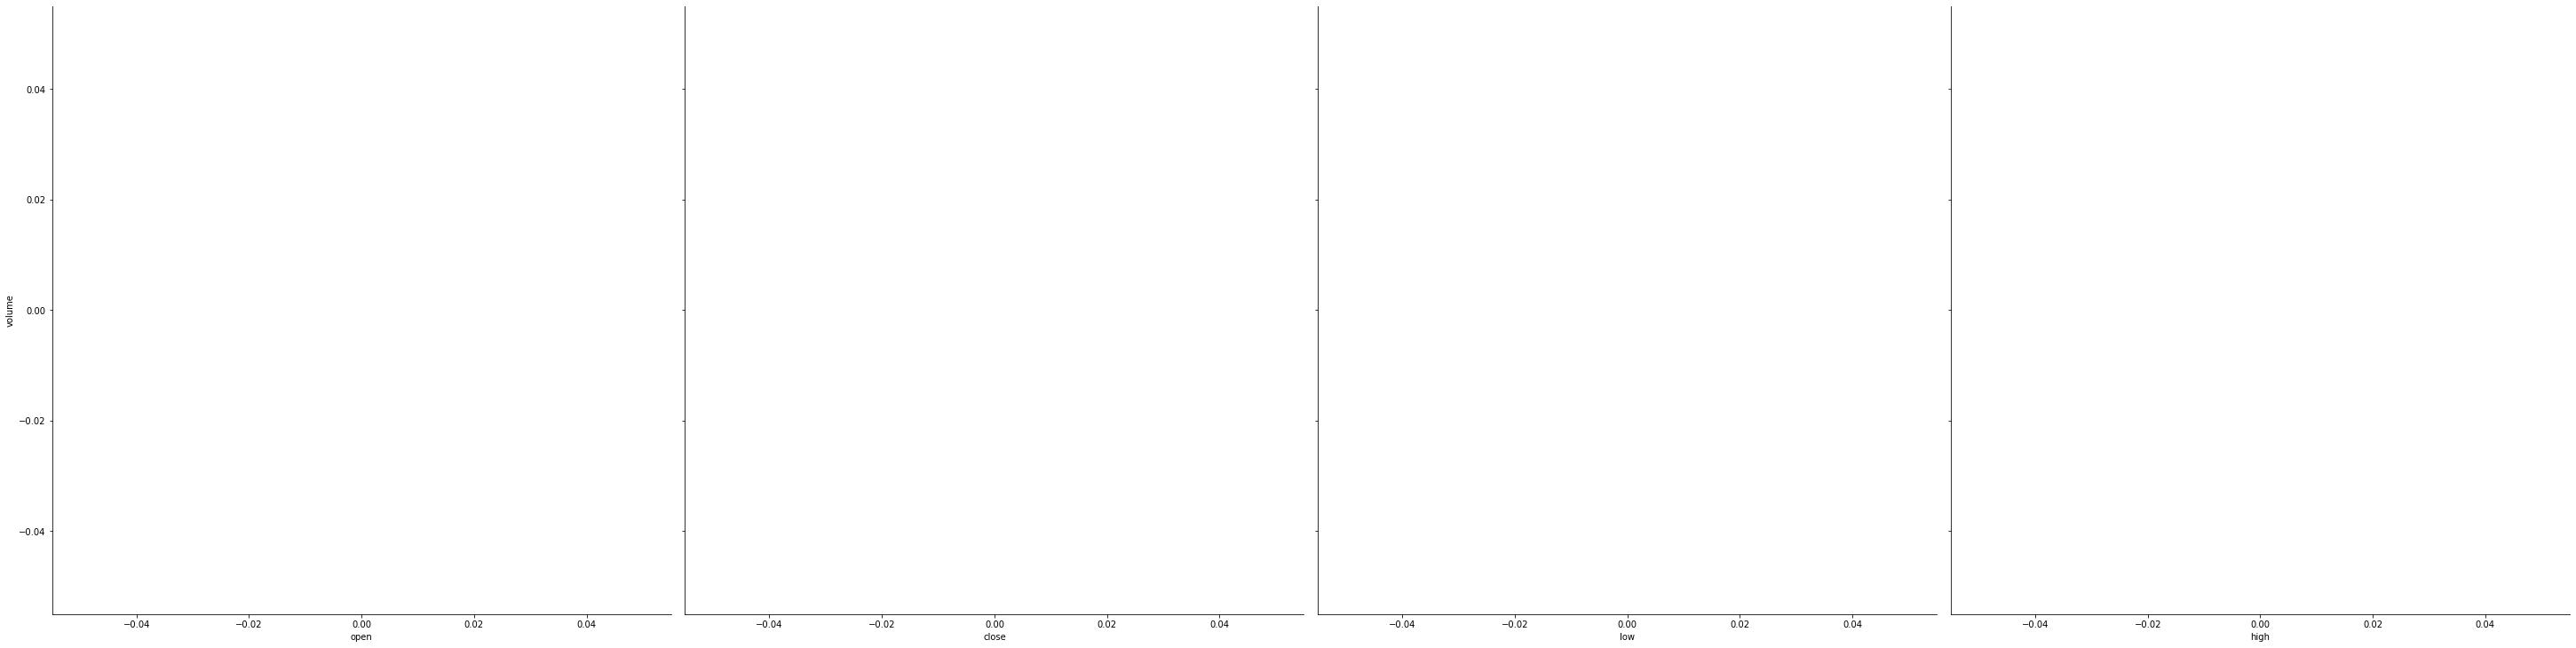

In [ ]:
msft_2016 = dataMSFT.set_index('date')
msft_2016 = dataMSFT.loc['2015-01':'2015-12']

sns.pairplot(msft_2016, x_vars=['open', 'close', 'low', 'high'], y_vars=['volume'], height=10, kind='reg')

In [ ]:
input = 47
print(dataMSFT.iloc[(dataAAPL['open']-input).abs().argsort()[:2]])
print(dataMSFT.iloc[(dataAAPL['high']-input).abs().argsort()[:2]])
print(dataMSFT.iloc[(dataAAPL['low']-input).abs().argsort()[:2]])
print(dataMSFT.iloc[(dataAAPL['close']-input).abs().argsort()[:2]])

             date   open   high    low   close    volume  Name
390246 2013-04-19  29.62  30.24  29.61  29.765  99790116  MSFT
390295 2013-06-28  34.38  34.79  34.34  34.545  65545445  MSFT
             date   open   high    low   close    volume  Name
390246 2013-04-19  29.62  30.24  29.61  29.765  99790116  MSFT
390295 2013-06-28  34.38  34.79  34.34  34.545  65545445  MSFT
             date   open   high    low   close    volume  Name
390246 2013-04-19  29.62  30.24  29.61  29.765  99790116  MSFT
390295 2013-06-28  34.38  34.79  34.34  34.545  65545445  MSFT
             date   open   high    low   close    volume  Name
390246 2013-04-19  29.62  30.24  29.61  29.765  99790116  MSFT
390245 2013-04-18  28.95  28.98  28.50  28.790  56772087  MSFT


## Machine learning forecasting on Apple stock

In [ ]:
x = dataAAPL[['open', 'low', 'high']]
y = dataAAPL['close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print(f"Total records : {len(X_train) + len(X_test)}")

944
315
944
315
Total records : 1259


### Linear regression model

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(round(linreg.intercept_, 3))
print(linreg.coef_)

-0.119
[-0.55110259  0.75882388  0.79347569]


In [ ]:
linreg.predict(X_test)

array([115.88820261, 110.09143176, 116.93407737, 125.22232926,
       132.14802809,  64.62127095, 173.18238514,  61.37773493,
       115.5413601 , 155.17712487, 117.81187732,  61.10550736,
       152.98748003, 156.99220652,  99.19001746, 130.25624072,
       154.90195465, 150.33987387,  96.0022943 , 114.05640596,
       108.70854605, 145.92203537,  76.91067136,  75.39630736,
       112.65827638,  94.78199039, 114.38412904,  97.7846639 ,
       171.25979048,  79.29413175, 116.51462872, 161.52921201,
       126.05512274,  63.67898582,  70.63496622,  99.13825111,
        97.3391312 , 119.29592573, 130.43342438,  75.56111866,
       153.48140782,  98.90855958,  74.81298405, 116.31749748,
       110.28960679, 150.88482789,  95.6388247 , 118.92055404,
       166.44207893, 140.65843858, 168.642021  ,  76.19441918,
        74.94902796, 114.26360812,  79.06337969,  76.85433251,
        71.59286796,  71.91758634,  62.53119819,  98.06085575,
       174.69288011,  79.11920521,  65.25141086, 141.63

In [ ]:
round(linreg.score(X_test, y_test)*100, 3)

99.966